# Carregar conjunto de documentos

In [1]:
import os
from itertools import islice

path="/home/leonard/Faculdades/ESTACIO/Projetos/IC/2017-2018/Luiz/Dados/SistMicroprocessadores"
def encontraArquivosEmPastaRecursivamente(pasta, extensao):
    arquivosTxt = []
    caminhoAbsoluto = os.path.abspath(pasta)
    for pastaAtual, subPastas, arquivos  in os.walk(caminhoAbsoluto):
        arquivosTxt.extend([os.path.join(pastaAtual,arquivo) for arquivo in arquivos if arquivo.endswith('.txt')])
    return arquivosTxt


arquivos = encontraArquivosEmPastaRecursivamente(path, '.txt')

'''
Padrão do arquivo
1a linha: <nota atribuída> de <valor da questão>
2a linha: em branco
3a linha em diante: resposta
'''
corpus_respostas=[]
for a in arquivos:
    arq = open(a,'r')
    with open(a) as lines:
        #lines = arq.readlines()
        lines = [lines.rstrip("\n") for lines in arq] #retirar o caracter de fim de linha
        # then skip the next 2
        for line in islice(lines, 3):
            pass
        corpus_respostas.append(line)
    arq.close()
print(corpus_respostas)       

['watchdog timer: esse temporizador reinicializa o microcontrolador (sistema operacional), quando ocorre a falha em atualizar o registrador. Logo, esse evento externo é enviado para um endereço pré-definido, onde o mesmo será tratado. Assim, após o tratamento do evento, o sistema volta a operar à partir de onde ocorreu o desvio.', 'Um desvio em um programa ocorre quando alguma condição esvio prevista ocorre anteriormente à instrução de desvio. A instrução de desvio básica é a GOTO, que leva o programa para a linha determinada nesta instrução.', 'Incondicional -> ocorre independente de qualquer fator. Nesse caso ocorrera o GOTO. Condicional -> depende de algumas condições a serem atendidas a partir de testes. Esses desvios ocorrem quando o programa sai da sua sequencia de funcionamento.', 'Desvio acontece quando há necessidade do operador intervir no programa. Pode ser programável ou de forma imediata de acordo com a necessidade.', 'O desvio ocorre sempre que o programa sai de sequência

**ETAPA** 1
===
Avaliar a qualidade das respostas, independente do gabarito, pautadas na ocorrência de:
1. erros de grafia;
2. erros gramaticais;  

In [2]:
respostas = ['Tais comandos devem ser colocados dentro de um bloco try. Porque no caso de ocorrer um exceção no bloco try, ela será lançado, os demais comandos da bloco serão suspensos, e o controle passará para o primeiro bloco catch que tenha um parâmetro de modelo compatível com a exceção lançada.','Tais comandos devem ser colocados dentro de um bloco try. Porque no caso de ocorrer um exceção no bloco try, ela será lançado, os demais comandos da bloco serão suspensos, e o controle passará para o primeiro bloco catch que tenha um parâmetro de tipo compatível com a exceção lançada.','Tais comandos devem ser colocados dentro de um bloco try. Porque no caso de ocorrer um exceção no bloco try, ela será lançado, os demais comandos da bloco serão suspensos, e o controle passará para o primeiro bloco catch que tenha um parâmetro de tipo compatível com a exceção lançada.','Tais comandos devem ser colocados dentro de um bloco try. Porque no caso de ocorrer um exceção no bloco try, ela será lançado, os demais comandos da bloco serão suspensos, e o controle passará para o primeiro bloco catch que tenha um parâmetro de tipo compatível com a exceção lançada.']

import re
import SpellChecker as sc
from nltk.corpus import wordnet

respostasSemPontuacao=[]
for r in corpus_respostas:
    respostasSemPontuacao.append(re.sub('[->(),.]', '', r))
    
for r in respostasSemPontuacao:
	words = r.lower().split()

# Verifica o número de erros entre os termos e a correção
errors = 0
doc_size = len(words)
for w in words:
    if not wordnet.synsets(w): #se o termo não estiver em inglês
        if w != sc.correction(w):
            print(w," ~> ",sc.correction(w))
            errors+=1
err_per=(errors/doc_size)*100
print(errors," erro(s)\n(%%): %.2f" %err_per)

registrador  ~>  registrado
controlador  ~>  consolador
2  erro(s)
(%): 14.29


ANÁLISE GRAMATICAL
===
> A Análise gramatical é realizada sobre o conjunto de respostas original, ou seja, considera-se o texto na íntegra, com pontuações, etc.

> Uso do Cogroo (https://github.com/gpassero/cogroo4py) para análise gramatical

* Deve-se executar o arquivo cogroo4py.jar no console

> ``` $ java -jar cogroo4py.jar & ```


In [3]:
from cogroo_interface import Cogroo

cogroo = Cogroo.Instance()
# Avalia cada sentença de cada resposta, apresentando o(s) erro(s) da determinada 
#sentença
for r in corpus_respostas:
    sdoc = cogroo.grammar_check(r)
    for s in sdoc.sentences:
        str_sentences = str(s)
        d = cogroo.grammar_check(str_sentences)
        err = d.mistakes
        print("\n\n",str_sentences," ~ ",err, "\n\n")
    print("\n\nErros: ", len(sdoc.mistakes))



 watchdog timer:  ~  [] 




 esse temporizador reinicializa o microcontrolador (sistema operacional), quando ocorre a falha em atualizar o registrador.  ~  [] 




 Logo, esse evento externo é enviado para um endereço pré-definido, onde o mesmo será tratado.  ~  [] 




 Assim, após o tratamento do evento, o sistema volta a operar à partir de onde ocorreu o desvio.  ~  [[xml:4] Não acontece crase antes de verbo.] 




Erros:  1


 Um desvio em um programa ocorre quando alguma condição esvio prevista ocorre anteriormente à instrução de desvio.  ~  [] 




 A instrução de desvio básica é a GOTO, que leva o programa para a linha determinada nesta instrução.  ~  [] 




Erros:  0


 Incondicional -> ocorre independente de qualquer fator.  ~  [] 




 Nesse caso ocorrera o GOTO.  ~  [] 




 Condicional -> depende de algumas condições a serem atendidas a partir de testes.  ~  [] 




 Esses desvios ocorrem quando o programa sai da sua sequencia de funcionamento.  ~  [] 




Erros:  0


 


ETAPA 1.ii) 
===
Verificar Similaridade entre documentos (especificar que tipos de métricas foram utilizadas - string-based; term-based)

258.0


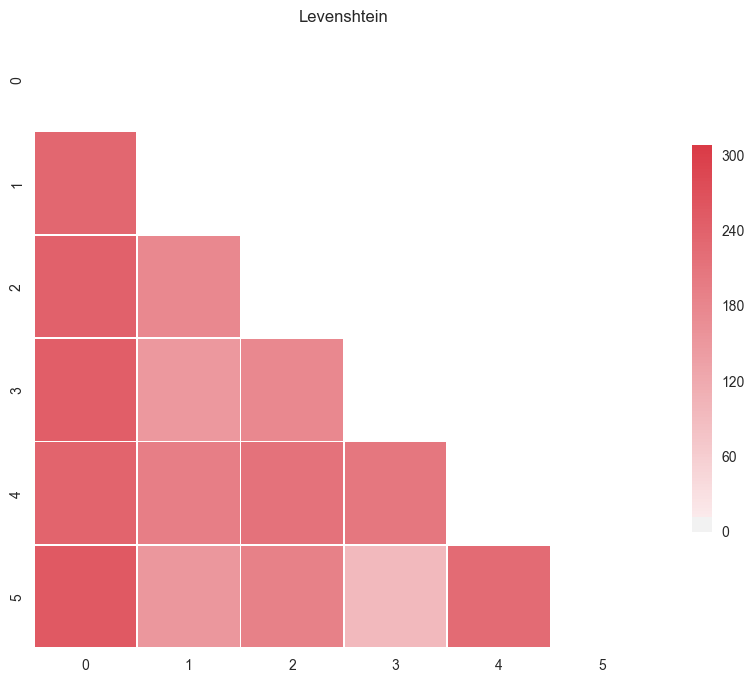

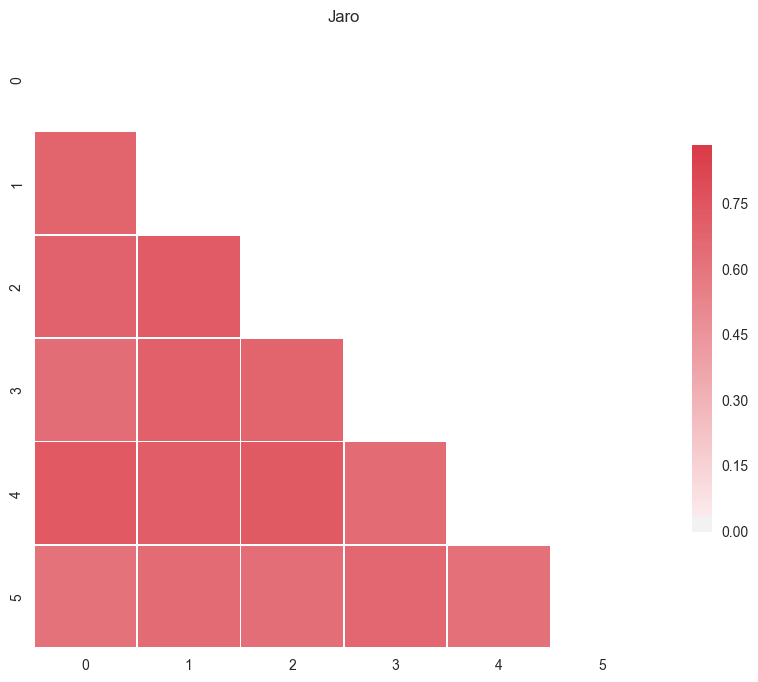

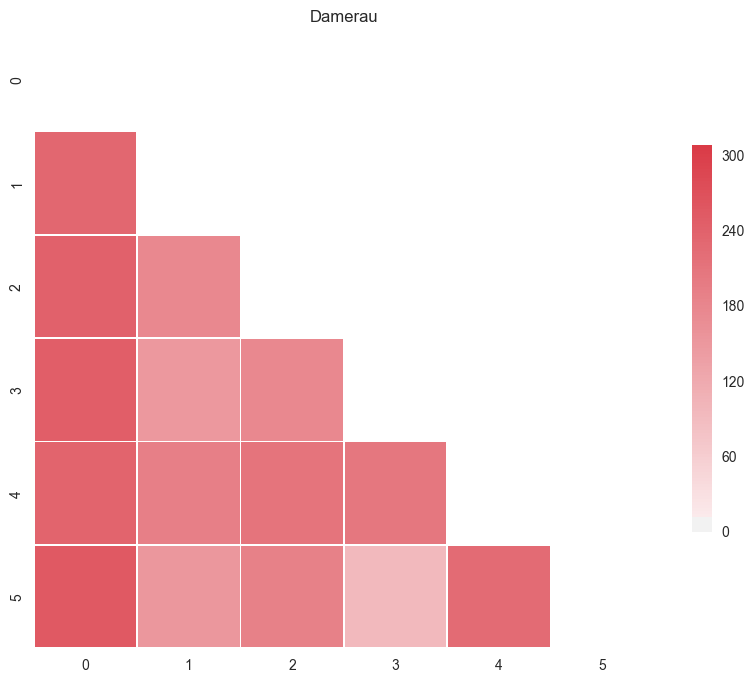

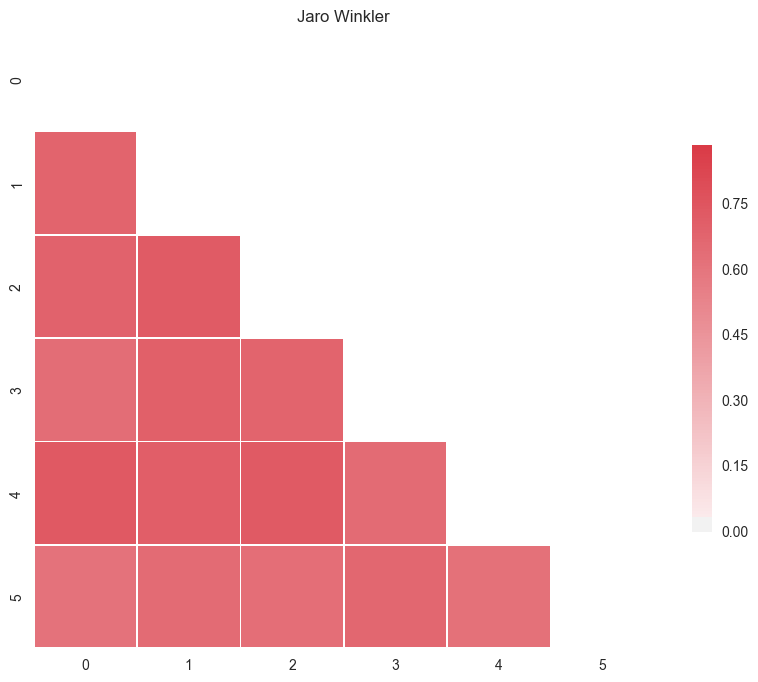

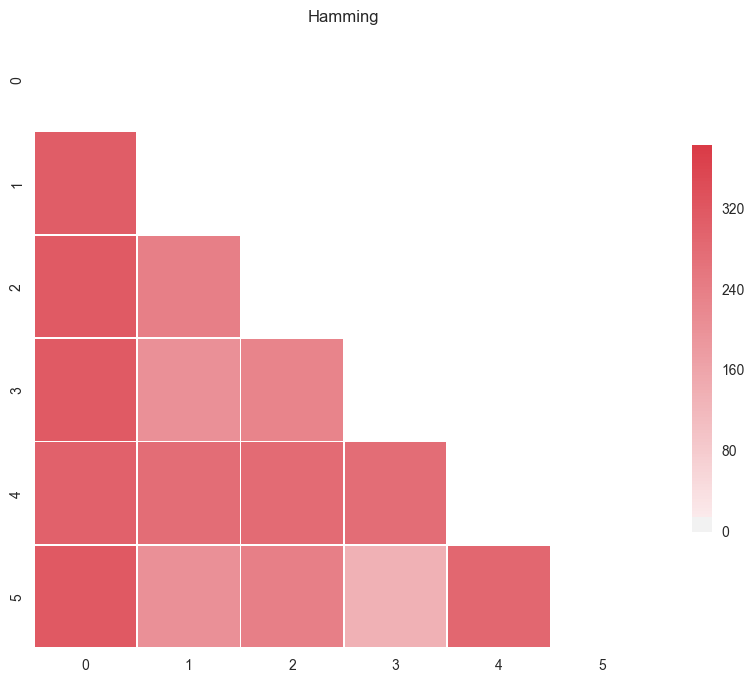

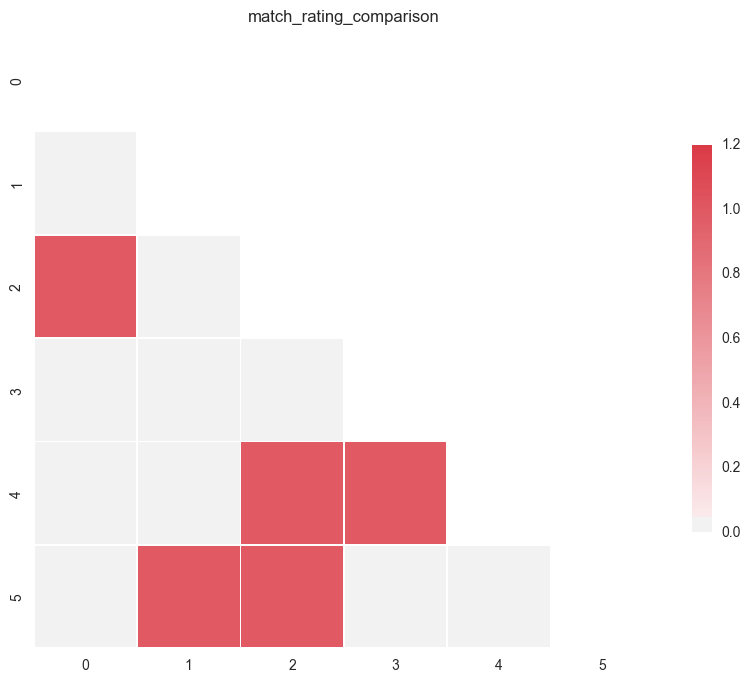

In [4]:
from similarity2 import *
print(numpy.nanmax(sim(levenshtein,corpus_respostas)))
grafico_similaridade(sim(levenshtein,corpus_respostas),"Levenshtein")
grafico_similaridade(sim(jaro,corpus_respostas),"Jaro")
grafico_similaridade(sim(damerau,corpus_respostas),"Damerau")
grafico_similaridade(sim(jaro_winkler,corpus_respostas),"Jaro Winkler")
grafico_similaridade(sim(hamming,corpus_respostas),"Hamming")
grafico_similaridade(sim(match_rating_comparison,corpus_respostas),"match_rating_comparison")



ETAPA 2
====
Avaliar a similaridade das respostas com base no gabarito. Esta fase é composta pelas seguintes subetapas:
1. Construir um dicionário de sinônimos com base no gabarito, onde o termo do gabarito é a chave.
2. Avaliar termos de cada uma das respostas. Na existência de sinônimos, o termo será substituído pela respectiva  chave do dicionário.

### Etapa 2.1

In [5]:
import nltk
from pysinonimos.sinonimos import Search, historic
gabarito = ['Tais comandos devem ser colocados dentro de um bloco try. Porque no caso de ocorrer um exceção no bloco try, ela será lançado, os demais comandos da bloco serão suspensos, e o controle passará para o primeiro bloco catch que tenha um parâmetro de tipo compatível com a exceção lançada.']
stopwords = nltk.corpus.stopwords.words('portuguese')


gabaritoSemPontuacao=[]
for g in gabarito: 
    gabaritoSemPontuacao.append(re.sub('[,.]', '', g)) #retirar pontuação

words=[]    
for g in gabaritoSemPontuacao:
	words = g.lower().split() #colocar em caixa baixa e dividir sentença em termos


dicionario = dict()
#Cria dicionário com palavras do gabarito que não estão nas stopwords
for w in words: 
    if w not in stopwords:
        dicionario[w]=[]


#Cada chave do dicionário é atribuída a respectiva lista de sinônimos
for k in iter(dicionario.keys()):
    key = Search(k)
    syn = key.synonyms()
    if (isinstance(syn,list)):
        dicionario[k]=syn
        


### Etapa 2.2

In [6]:
'''
Parâmetros:
values -> dicionário
searchFor - > termo de pesquisa 

Retorno:
a chave correspondente ao parâmetro especificado em searchFor
'''
def search(values, searchFor):
    for k in values:
        for v in values[k]:
            if searchFor in v:
                return k
    return None 


#Procura em cada resposta a existência do termo como valor no dicionário. 
#Caso exista, troca o termo sinônimo pela chave
normalizedString = []
for index,r in enumerate(respostasSemPontuacao):
    sentence = []
    words = r.lower().split()
    for w in words:
        if w not in stopwords:
            syn =search(dicionario,w)
            if w != syn and syn!= None:
                #print("doc[",index,"]",w," ~ ",search(dicionario,w))
                sentence.append(syn)
            else:
                sentence.append(w)
    #print(' '.join([str(x) for x in sentence]))
    normalizedString.append(' '.join([str(x) for x in sentence]))
print(corpus_respostas)
print(normalizedString)
    
       

['watchdog timer: esse temporizador reinicializa o microcontrolador (sistema operacional), quando ocorre a falha em atualizar o registrador. Logo, esse evento externo é enviado para um endereço pré-definido, onde o mesmo será tratado. Assim, após o tratamento do evento, o sistema volta a operar à partir de onde ocorreu o desvio.', 'Um desvio em um programa ocorre quando alguma condição esvio prevista ocorre anteriormente à instrução de desvio. A instrução de desvio básica é a GOTO, que leva o programa para a linha determinada nesta instrução.', 'Incondicional -> ocorre independente de qualquer fator. Nesse caso ocorrera o GOTO. Condicional -> depende de algumas condições a serem atendidas a partir de testes. Esses desvios ocorrem quando o programa sai da sua sequencia de funcionamento.', 'Desvio acontece quando há necessidade do operador intervir no programa. Pode ser programável ou de forma imediata de acordo com a necessidade.', 'O desvio ocorre sempre que o programa sai de sequência